## Algorytm Najbliższego Sąsiada - Nearest Neighbor Algorithm


### Działanie algorytmu 


Algorytm rozpoczyna działanie od wybranego wierzchołka (nazwijmy go wierzchołkiem początkowym) i polega na kolejnym przechodzeniu do najbliższego nieodwiedzonego sąsiada ostatnio dodanego wierzchołka. W bardziej formalnym zapisie algorytm działa w następujący sposób:

1. Wierzchołek początkowy oznaczamy jako odwiedzony i ustawiamy jako aktualny.
2.Znajdujemy najkrótszą spośród krawędzi łączących aktualny wierzchołek z jeszcze nieodwiedzonymi wierzchołkami.
3. Dołączamy do rozwiązania krawędź znalezioną w punkcie 2.
4. Wierzchołek będący drugim końcem krawędzi znalezionej w punkcie 2 oznaczamy jako odwiedzony i ustawiamy jako aktualny.
5. Jeśli są jeszcze nieodwiedzone wierzchołki, przechodzimy do punktu 2.
6. Dołączamy krawędź łączącą ostatnio dodany wierzchołek z wierzchołkiem początkowym. Zamykamy w ten sposób cykl.


Źródło: http://algorytmy.ency.pl/artykul/algorytm_najblizszego_sasiada

In [3]:
from math import *
import numpy as np
import folium
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# funkcja zamieniająca dł i sz geograficzną na współrzędne x,y,z
def latlonhtoxyzwgs84(lat,lon,h):
     a=6378137.0 #radius a of earth in meters cfr WGS84
     b=6356752.3 #radius b of earth in meters cfr WGS84
     e2=1-(b**2/a**2)
     latr=lat/90*0.5*pi #latitude in radians
     lonr=lon/180*pi #longituede in radians
     Nphi=a/sqrt(1-e2*sin(latr)**2)
     x=(Nphi+h)*cos(latr)*cos(lonr)
     y=(Nphi+h)*cos(latr)*sin(lonr)
     z=(b**2/a**2*Nphi+h)*sin(latr)
     return([x,y,z])
 
# funkcja oblicza dystans między dwoma miastami (Odległość euklidesowa)
def distance(place1, place2):
     x1, y1, z1 = place1
     x2, y2, z2 = place2
     dist = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
     return dist


def all_nearest_neighbors(distances):
    n = len(distances)
    all_paths = []
    all_distances = []
    for start_city in range(n):
        visited = [False] * n
        path = [start_city] * n
        visited[start_city] = True
        total_distance = 0
        for i in range(1, n):
            current_city = path[i-1]
            min_distance = float('inf')
            nearest_city = None
            for j in range(n):
                if not visited[j] and distances[current_city][j] < min_distance:
                    min_distance = distances[current_city][j]
                    nearest_city = j
            visited[nearest_city] = True
            path[i] = nearest_city
            total_distance += min_distance
        path.append(start_city)
        total_distance += distances[path[-2]][start_city]
        all_paths.append(path)
        all_distances.append(total_distance)
    return all_paths, all_distances


In [5]:


places = [("Aleksandrow Kujawski", 52.880, 18.700),
          ("Aleksandrow Lodzki", 51.820, 19.299),
          ("Barlinek", 52.999, 15.199),
          ("Bielsko-Biala", 49.819, 19.049),
          ("Płock", 52.550, 19.700),
          ("Darłowo", 54.419, 16.410),
          ("Gostynin", 53.430, 19.430),
          ("Inowroclaw", 52.780, 18.249),
          ("Jawor", 51.060, 16.200),
          ("Kostrzyn", 52.589, 14.649),
          ("Toruń", 53.020, 18.609)]
         

In [6]:
city_coords = []

for place in places:
    x,y,z = latlonhtoxyzwgs84(place[1], place[2], 0)
    city_coords.append((place[0], x, y, z))

In [7]:
#  distances jest macierzą sąsiedztwa
distances = []

for i in range(len(city_coords)):
    row = []
    for j in range(len(city_coords)):
        dist = distance(city_coords[i][1:], city_coords[j][1:]) / 1000
        row.append(round(dist, 3))
    distances.append(row)


In [8]:
print("\nLista miast")
i=0
for place in places:
    print(i,place[0])
    i=i+1
    


Lista miast
0 Aleksandrow Kujawski
1 Aleksandrow Lodzki
2 Barlinek
3 Bielsko-Biala
4 Płock
5 Darłowo
6 Gostynin
7 Inowroclaw
8 Jawor
9 Kostrzyn
10 Toruń


In [9]:

print("\nMacierz sąsiedztwa\n")
for row in distances:
    for distance in row:
        print("{:.3f}".format(distance), end=" ")
    print()
    


Macierz sąsiedztwa

0.000 124.810 235.711 341.376 76.910 228.590 78.302 32.371 265.517 275.489 16.738 
124.810 0.000 308.218 223.285 85.732 347.845 179.373 128.609 231.439 329.107 141.537 
235.711 308.218 0.000 443.540 307.755 177.111 286.620 206.707 226.405 58.806 228.866 
341.376 223.285 443.540 0.000 307.186 542.557 402.557 334.071 244.946 435.117 357.395 
76.910 85.732 307.755 307.186 0.000 301.521 99.595 101.447 292.780 342.390 90.297 
228.590 347.845 177.111 542.557 301.521 0.000 226.850 219.286 374.009 234.778 212.853 
78.302 179.373 286.620 402.557 99.595 226.850 0.000 107.183 343.713 334.169 71.334 
32.371 128.609 206.707 334.071 101.447 219.286 107.183 0.000 237.659 244.337 36.058 
265.517 231.439 226.405 244.946 292.780 374.009 343.713 237.659 0.000 200.921 273.596 
275.489 329.107 58.806 435.117 342.390 234.778 334.169 244.337 200.921 0.000 271.278 
16.738 141.537 228.866 357.395 90.297 212.853 71.334 36.058 273.596 271.278 0.000 


In [10]:

all_paths, all_distances = all_nearest_neighbors(distances)


shortest_distance = min(all_distances)
shortest_path = all_paths[all_distances.index(shortest_distance)]

In [11]:
print("\nNajkrótsza ścieżka:", shortest_path)
print("Dystans:", shortest_distance, "km")


Najkrótsza ścieżka: [7, 0, 10, 6, 4, 1, 3, 8, 9, 2, 5, 7]
Dystans: 1430.125 km


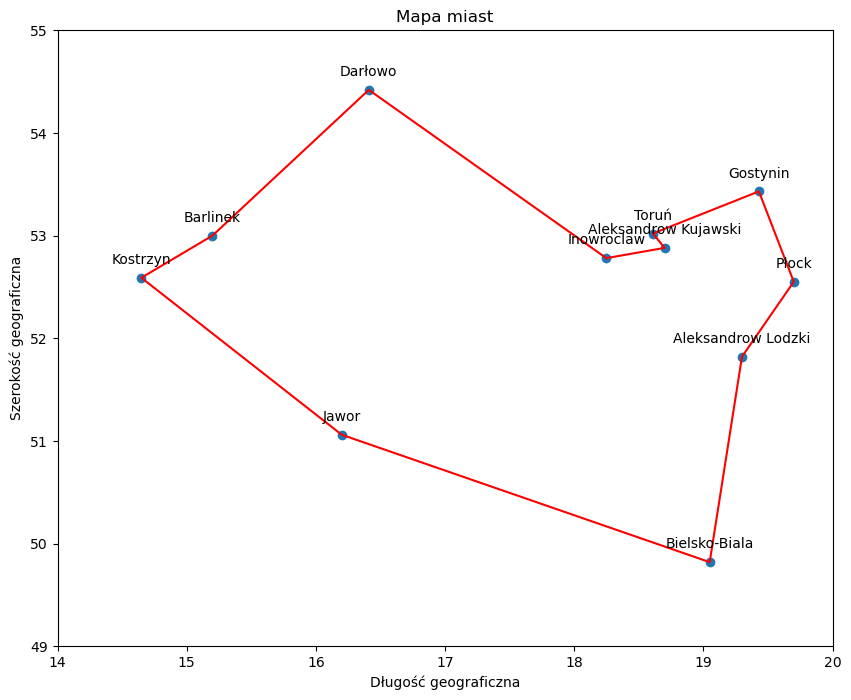

In [12]:

path = [7, 0, 10, 6, 4, 1, 3, 8, 9, 2, 5, 7]

latitudes = [place[1] for place in places]
longitudes = [place[2] for place in places]


plt.figure(figsize=(10, 8))


plt.scatter(longitudes, latitudes)


plt.xlabel('Długość geograficzna')
plt.ylabel('Szerokość geograficzna')
plt.title('Mapa miast')


for i, place in enumerate(places):
    plt.annotate(place[0], (place[2], place[1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlim(14, 20)
plt.ylim(49, 55)



path_coordinates = [(longitudes[i], latitudes[i]) for i in path]
plt.plot([coord[0] for coord in path_coordinates], [coord[1] for coord in path_coordinates], 'r-')

plt.show()


In [14]:

df = pd.DataFrame(places, columns=['city', 'lat', 'lon'])
m = folium.Map(location=[52.0, 19.0], zoom_start=7)
for i in range(len(path)-1):
    start = df.iloc[path[i]]
    end = df.iloc[path[i+1]]
    folium.Marker([start['lat'], start['lon']], popup=start['city']).add_to(m)
    folium.PolyLine([(start['lat'], start['lon']), (end['lat'], end['lon'])], color="red", weight=2.5, opacity=1).add_to(m)
    folium.Marker([end['lat'], end['lon']], popup=end['city']).add_to(m)
m
